# Bike Renting Analysis

Data: extracted information from bike rental service aggregated by hour here hour.csv with description  Readme.txt. Also available in HOMEWORK_DATASETS[‘bike_sharing_hour’] library bds_courseware.

Target: `cnt` - Number of bikes rented per hour (unless explicitly stated otherwise). It is a sum of ‘casual’ + ‘registered’ so make sure the latter does not appear in train sample.

Test sample: random subsample of the data (5-15% size) unless explicitly stated otherwise.

Metrics: MAE

To-do:

EDA (10%)

Preprocessing (10%)

Use different advanced regression algorithms and select the best one:

KNN Regressor (5%)

Decision Tree Regressor (5%)

Random Forest (5%)

SVM Regressor (5%)

Boosting Regressor - any Boosting algorithm with Regression (5%)

Warning! The task is considered to be done for each model if a hyperparameter tuning was performed and the quality is measured on a test sample.

Considering the best model, train it on the first year and validate on the second year. The results are better or worse? Why? (10%)

Considering the best model, train it on the first year with multitarget (casual, registered) and validate on the second year. Analyze both targets independently. Then use a sum of both targets to predict cnt on the second year. Estimate the quality. Are the results better or worse in comparison with the previous step? Why? (10%)

During your research, please answer the following questions:

What are the most influential features? (5%)

How the temperature and humidity affect rental count rates? (5%)

What is more important: current season or current hour, temperature or feeling temperature? Why? (5%)

Total points 80% + 20% for additional research which is not included in the criteria. 

In [ ]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [ ]:
!cat Readme.txt

Bike Sharing Dataset

Hadi Fanaee-T

Laboratory of Artificial Intelligence and Decision Support (LIAAD), University of Porto
INESC Porto, Campus da FEUP
Rua Dr. Roberto Frias, 378
4200 - 465 Porto, Portugal


Background 

Bike sharing systems are new generation of traditional bike rentals where whole process from membership, rental and return 
back has become automatic. Through these systems, user is able to easily rent a bike from a particular position and return 
back at another position. Currently, there are about over 500 bike-sharing programs around the world which is composed of 
over 500 thousands bicycles. Today, there exists great interest in these systems due to their important role in traffic, 
environmental and health issues. 

Apart from interesting real world applications of bike sharing systems, the characteristics of data being generated by
these systems make them attractive for the research. Opposed to other transport services such as bus or subway, the duration
of tra

# EDA

In [ ]:
bike_df = pd.read_csv('hour.csv')
bike_df

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,17375,2012-12-31,1,1,12,19,0,1,1,2,0.26,0.2576,0.60,0.1642,11,108,119
17375,17376,2012-12-31,1,1,12,20,0,1,1,2,0.26,0.2576,0.60,0.1642,8,81,89
17376,17377,2012-12-31,1,1,12,21,0,1,1,1,0.26,0.2576,0.60,0.1642,7,83,90
17377,17378,2012-12-31,1,1,12,22,0,1,1,1,0.26,0.2727,0.56,0.1343,13,48,61


In [ ]:
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [ ]:
bike_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


In [ ]:
bike_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

It seems there is no NA values.

In [ ]:
TARGET = 'cnt'

In [ ]:
bike_df[TARGET].describe()

count    17379.000000
mean       189.463088
std        181.387599
min          1.000000
25%         40.000000
50%        142.000000
75%        281.000000
max        977.000000
Name: cnt, dtype: float64

Text(0.5, 1.0, 'Bike Rental Counts')

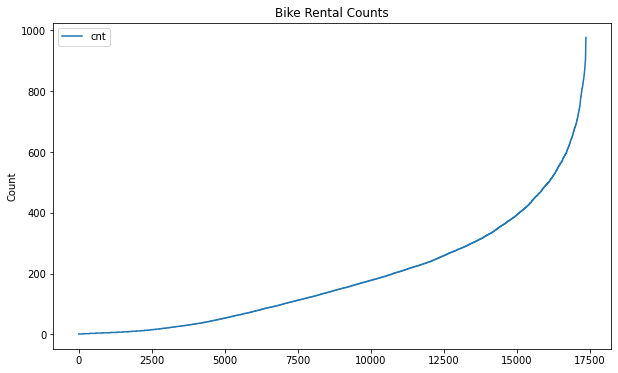

In [ ]:
plt.figure(figsize = (10, 6))
plt.plot(sorted(bike_df[TARGET]), label = 'cnt')
plt.legend(loc = 'upper left')
plt.ylabel('Count')
plt.title('Bike Rental Counts')

In [ ]:
bike_df.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'hr', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

Firstly, we don't need `instant` feature, since it's the same as the id in each row.

Second, we can calculate the date from the other features, so I will drop the `dteday` feature too, because it is redundant.

In [ ]:
df = bike_df.drop(columns = ['instant', 'dteday'], axis = 1)

We have two column for normalized temperatures. Let's check them.

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Temp Boxplot')

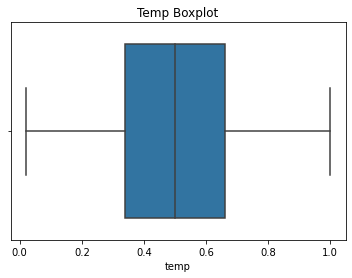

In [ ]:
sns.boxplot(df['temp'])
plt.title('Temp Boxplot')

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Atemp boxplot')

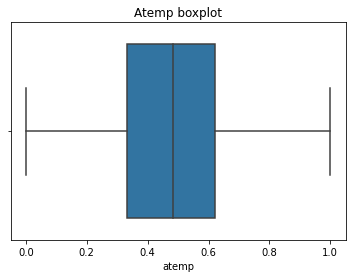

In [ ]:
sns.boxplot(df['atemp'])
plt.title('Atemp boxplot')

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Bike rents / temp')

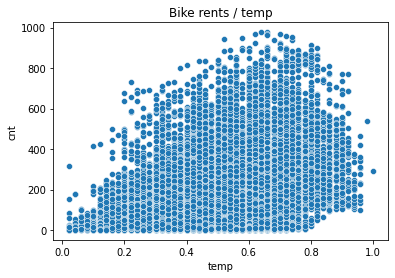

In [ ]:
sns.scatterplot(df['temp'], df[TARGET])
plt.title('Bike rents / temp')

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Bike rents / atemp')

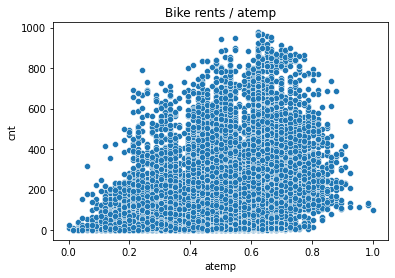

In [ ]:
sns.scatterplot(df['atemp'], df[TARGET])
plt.title('Bike rents / atemp')

As we can see, these plots are very similar to each other, so we can drop one of them to prevent multicollinearity. I choose to drop `atemp`, since it has a bit thiner boxplot, and in `temp`, more value in the $IQR$.

Also, we can see from this plot that the warmer the temperature, the more bike get rented.

In [ ]:
df = df.drop(columns = ['atemp'], axis = 1)

<AxesSubplot:xlabel='temp', ylabel='cnt'>

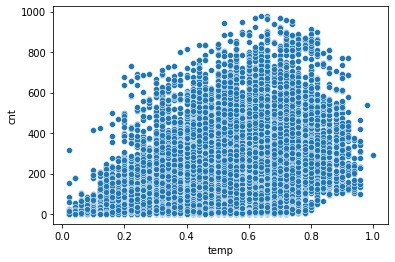

In [ ]:
sns.scatterplot(x = 'temp', y = TARGET, data = df)

<AxesSubplot:xlabel='hum', ylabel='cnt'>

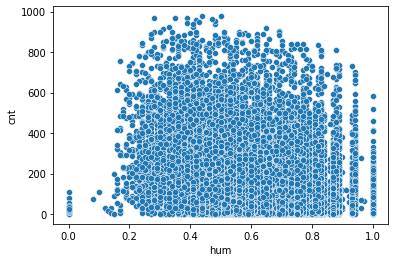

In [ ]:
sns.scatterplot(x = 'hum', y = 'cnt', data = df)

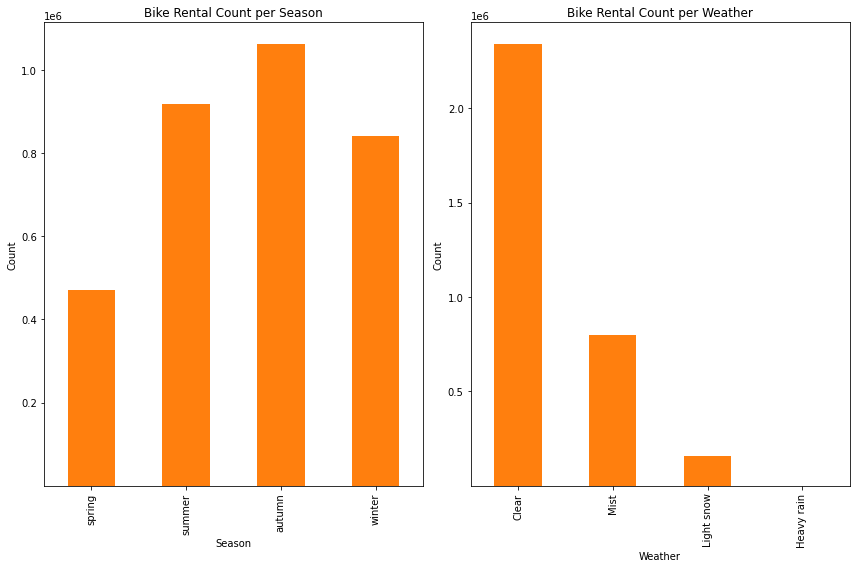

In [ ]:
f, (ax1, ax2) = plt.subplots(nrows = 1, ncols = 2, figsize = (12, 8))

ax1 = df[['season', TARGET]].groupby(['season']).sum().reset_index().plot(
    kind = 'bar',
    legend = False,
    title = 'Bike Rental Count per Season',
    ax = ax1,
    stacked = True
)
ax1.set_xlabel('Season')
ax1.set_ylabel('Count')
ax1.set_xticklabels(['spring', 'summer', 'autumn', 'winter'])


ax2 = df[['weathersit', TARGET]].groupby(['weathersit']).sum().reset_index().plot(
    kind = 'bar',
    legend = False,
    title = 'Bike Rental Count per Weather',
    ax = ax2,
    stacked = True
)
ax2.set_xlabel('Weather')
ax2.set_ylabel('Count')
ax2.set_xticklabels(['Clear', 'Mist', 'Light snow', 'Heavy rain'])

f.tight_layout()

The most bike rented in autumn, then summer. Interestingly, the lowest number of rented bikes in spring.

Also, in the second plot it's obvious that the most bike rented in clean weather, and very few in heavy rain.


Outliers

[Text(0.5, 0, 'Working Day'),
 Text(0, 0.5, 'Count'),
 Text(0.5, 1.0, 'Box Plot On Count Across Working Day')]

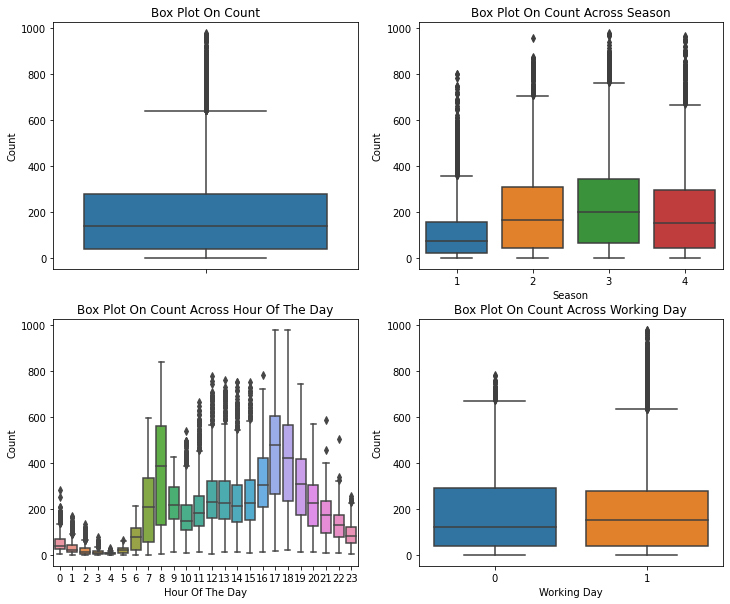

In [ ]:
fig, axes = plt.subplots(nrows=2,ncols=2)
fig.set_size_inches(12, 10)
sns.boxplot(data=df,y=TARGET,orient="v",ax=axes[0][0])
sns.boxplot(data=df,y=TARGET,x="season",orient="v",ax=axes[0][1])
sns.boxplot(data=df,y=TARGET,x="hr",orient="v",ax=axes[1][0])
sns.boxplot(data=df,y=TARGET,x="workingday",orient="v",ax=axes[1][1])

axes[0][0].set(ylabel='Count',title="Box Plot On Count")
axes[0][1].set(xlabel='Season', ylabel='Count',title="Box Plot On Count Across Season")
axes[1][0].set(xlabel='Hour Of The Day', ylabel='Count',title="Box Plot On Count Across Hour Of The Day")
axes[1][1].set(xlabel='Working Day', ylabel='Count',title="Box Plot On Count Across Working Day")

<AxesSubplot:>

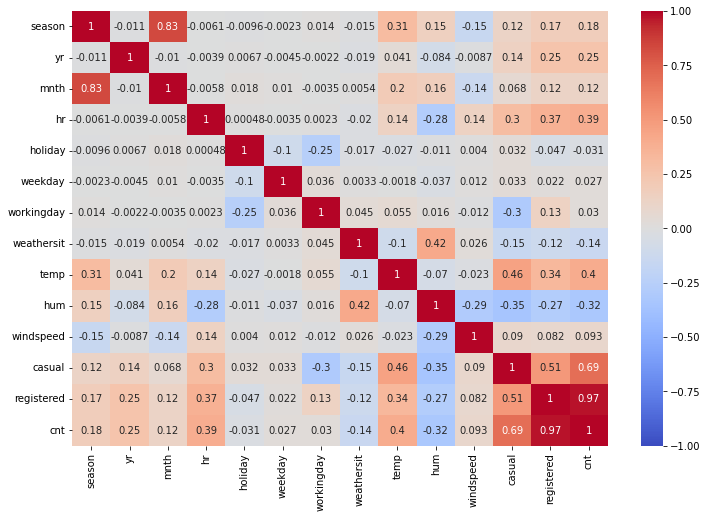

In [ ]:
plt.figure(figsize = (12, 8))
sns.heatmap(df.corr(), cmap = 'coolwarm', vmin = -1, vmax = 1, annot = True)

I will drop causal and registered, since from them it can calculated the target value, cnt.

In [ ]:
df = df.drop(columns = ['casual', 'registered'])

# ML

In [ ]:
def get_important_features(X_test, model):
  importances = model.feature_importances_
  for i, importance in enumerate(importances):
    print(f'Feature: {i}, {X_test.columns[i]}, {importance}')

In [ ]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

def print_results(y_test, y_pred):
  r2 = r2_score(y_test, y_pred)
  mae = mean_absolute_error(y_test, y_pred)
  rmse = mean_squared_error(y_test, y_pred, squared=False)

  print('R^2 score: {:.2f}'.format(r2))
  print('MAE: {:.2f}'.format(mae))
  print('RMSE: {:.2f}'.format(rmse))

In [ ]:
def visualize_regression(y_test, y_pred):
  sns.scatterplot(x = y_test, y = y_pred)
  plt.plot([0, 600], [0, 600])
  plt.xlabel('y_true')
  plt.ylabel('y_pred')

Split the data for train and test. As the homework description mentioned, I will train the model on the full dataset, then on the first year, and test it on the second.

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df.drop(columns = TARGET), df[TARGET], test_size = 0.2, random_state = 42)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(13903, 11) (13903,)
(3476, 11) (3476,)


## Linear Regression

### Full

In [ ]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [ ]:
y_pred = lr.predict(X_test)

In [ ]:
print_results(y_test, y_pred)

R^2 score: 0.39
MAE: 104.98
RMSE: 139.44


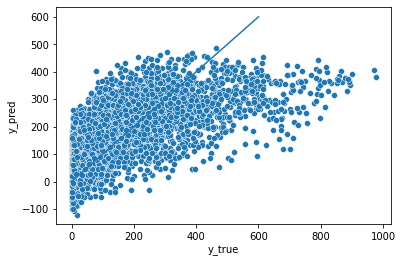

In [ ]:
visualize_regression(y_test, y_pred)

The results is not so satisfying.

### Train on first year

In [ ]:
train_df = df[df['yr'] == 0]
test_df = df[df['yr'] == 1] 

In [ ]:
X_train_year = train_df.drop(columns = TARGET)
y_train_year = train_df[TARGET]

X_test_year = test_df.drop(columns = TARGET)
y_test_year = test_df[TARGET]

In [ ]:
lr = LinearRegression()

lr.fit(X_train_year, y_train_year)

LinearRegression()

In [ ]:
y_pred = lr.predict(X_test_year)

print_results(y_test_year, y_pred)

R^2 score: 0.15
MAE: 130.90
RMSE: 192.44


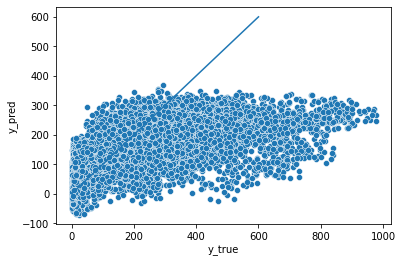

In [ ]:
visualize_regression(y_test_year, y_pred)

Training only for the first year gives pretty low results with logistic regression. Jump into other models.

## Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeRegressor

### Full

In [ ]:
dtm = DecisionTreeRegressor(max_depth = 4, min_samples_split = 5, max_leaf_nodes = 10)

dtm.fit(X_train, y_train)
print('R-Squared on train dataset =', dtm.score(X_test, y_test))

dtm.fit(X_test, y_test)
print('R-Squared on test dataset =', dtm.score(X_test, y_test))

R-Squared on train dataset = 0.5612561735556876
R-Squared on test dataset = 0.5640636237224368


In [ ]:
y_pred = dtm.predict(X_test)

print_results(y_pred, y_test)

R^2 score: 0.23
MAE: 82.03
RMSE: 117.49


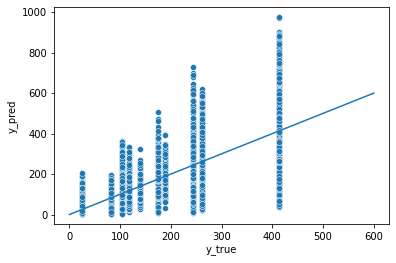

In [ ]:
visualize_regression(y_pred, y_test)

In [ ]:
get_important_features(X_test, dtm)

Feature: 0, season, 0.009830812105938684
Feature: 1, yr, 0.13282370565197796
Feature: 2, mnth, 0.0
Feature: 3, hr, 0.6556048095805165
Feature: 4, holiday, 0.0
Feature: 5, weekday, 0.0
Feature: 6, workingday, 0.0
Feature: 7, weathersit, 0.0
Feature: 8, temp, 0.2017406726615669
Feature: 9, hum, 0.0
Feature: 10, windspeed, 0.0


In [ ]:
from sklearn.model_selection import GridSearchCV, cross_val_score, cross_val_predict

In [ ]:
param_grid = {'criterion' : ['absolute_error'],
              'min_samples_split' : [10, 20, 40],
              'max_depth' : [2, 6, 8],
              'min_samples_leaf' : [20, 40, 100],
              'max_leaf_nodes' : [5, 20, 100]}

grid_cv_dtm = GridSearchCV(dtm, param_grid, cv = 5)
grid_cv_dtm.fit(X_train, y_train)

In [ ]:
dtm = DecisionTreeRegressor(max_depth = 8,
                            max_leaf_nodes = 100,
                            min_samples_leaf = 20,
                            min_samples_split = 10)

dtm.fit(X_train, y_train)
print('R-Squared on train dataset =', dtm.score(X_test, y_test))

dtm.fit(X_test, y_test)
print('R-Squared on test dataset =', dtm.score(X_test, y_test))

R-Squared on train dataset = 0.8304772435665893
R-Squared on test dataset = 0.8279203547110314


In [ ]:
y_pred = dtm.predict(X_test)

print_results(y_pred, y_test)

R^2 score: 0.79
MAE: 47.91
RMSE: 73.82


After Hyperparameter tuning, the results got really better.

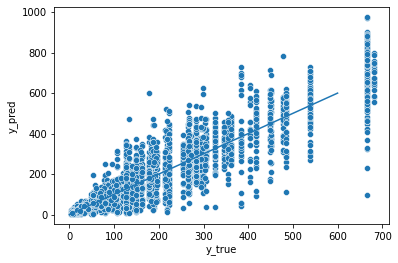

In [ ]:
visualize_regression(y_pred, y_test)

### Train on First Year

In [ ]:
dtm = DecisionTreeRegressor(max_depth = 10,
                            max_leaf_nodes = 120,
                            min_samples_leaf = 20,
                            min_samples_split = 15)

dtm.fit(X_test_year, y_test_year)

DecisionTreeRegressor(max_depth=10, max_leaf_nodes=120, min_samples_leaf=20,
                      min_samples_split=15)

In [ ]:
y_pred = dtm.predict(X_test_year)

print_results(y_test_year, y_pred)

R^2 score: 0.91
MAE: 39.56
RMSE: 61.94


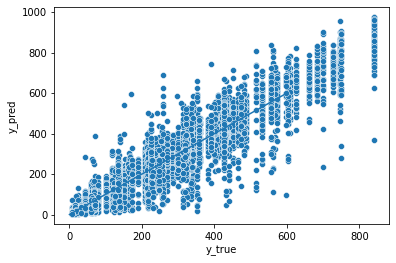

In [ ]:
visualize_regression(y_pred, y_test_year)

In [ ]:
get_important_features(X_test_year, dtm)

Feature: 0, season, 0.021271395411717717
Feature: 1, yr, 0.0
Feature: 2, mnth, 0.00489467915152086
Feature: 3, hr, 0.7472617969207193
Feature: 4, holiday, 0.0
Feature: 5, weekday, 0.0055590963363085
Feature: 6, workingday, 0.0783074296610373
Feature: 7, weathersit, 0.0092747688242498
Feature: 8, temp, 0.11894220070585157
Feature: 9, hum, 0.014078820661731007
Feature: 10, windspeed, 0.0004098123268638645


## KNN

### Full

In [ ]:
from sklearn.neighbors import KNeighborsRegressor

k = 5
knn = KNeighborsRegressor(n_neighbors = k)
knn.fit(X_train, y_train)

KNeighborsRegressor()

R^2 score: 0.90
MAE: 33.64
RMSE: 53.52


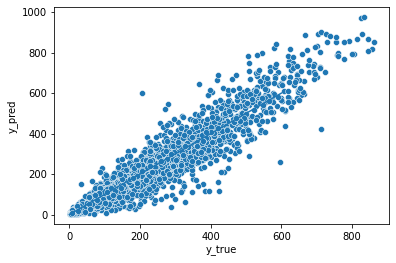

In [ ]:
y_pred = knn.predict(X_test)

print_results(y_pred, y_test)

visualize_regression(y_pred, y_test)

KNN Gives really nice results.

### Train on First Year

In [ ]:
from sklearn.neighbors import KNeighborsRegressor

k = 5
knn = KNeighborsRegressor(n_neighbors = k)
knn.fit(X_train_year, y_train_year)

KNeighborsRegressor()

R^2 score: 0.59
MAE: 93.36
RMSE: 133.55


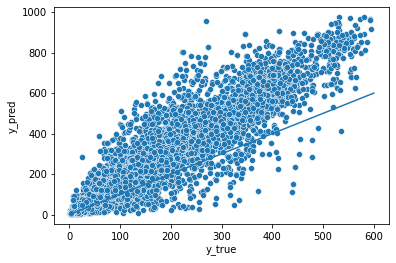

In [ ]:
y_pred = knn.predict(X_test_year)

print_results(y_test_year, y_pred)

visualize_regression(y_pred, y_test_year)

## Random Forest

### Full

In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
n_estimators = 100
rf = RandomForestRegressor(n_estimators = n_estimators, random_state = 42)

rf.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

R^2 score: 0.94
MAE: 24.81
RMSE: 42.31


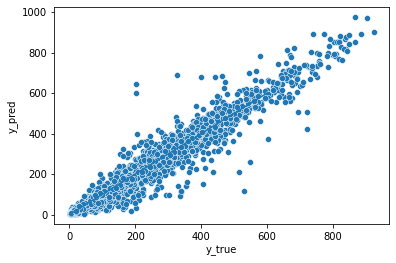

In [ ]:
y_pred = rf.predict(X_test)

print_results(y_test, y_pred)

visualize_regression(y_pred, y_test)

In [ ]:
get_important_features(X_test, rf)

Feature: 0, season, 0.022126293044566654
Feature: 1, yr, 0.08081063544238641
Feature: 2, mnth, 0.01740255310000254
Feature: 3, hr, 0.6125245220854123
Feature: 4, holiday, 0.0025909901574731786
Feature: 5, weekday, 0.01267731489793988
Feature: 6, workingday, 0.057899807410506814
Feature: 7, weathersit, 0.018703964562458802
Feature: 8, temp, 0.13518898730092793
Feature: 9, hum, 0.029000282629849872
Feature: 10, windspeed, 0.011074649368475464


Random Forest performing pretty well.

### Train on First Year

In [ ]:
n_estimators = 100
rf = RandomForestRegressor(n_estimators = n_estimators, random_state = 42)

rf.fit(X_train_year, y_train_year)

RandomForestRegressor(random_state=42)

R^2 score: 0.64
MAE: 88.64
RMSE: 125.13


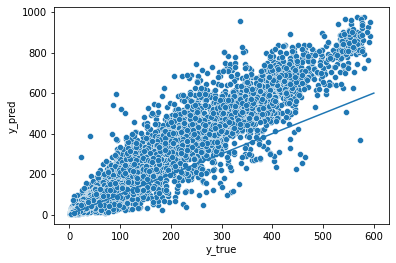

In [ ]:
y_pred = rf.predict(X_test_year) #0.64, 88

print_results(y_test_year, y_pred)

visualize_regression(y_pred, y_test_year)

In [ ]:
get_important_features(X_test_year, rf)

Feature: 0, season, 0.02710709051618552
Feature: 1, yr, 0.0
Feature: 2, mnth, 0.02087542333530553
Feature: 3, hr, 0.6266365106858491
Feature: 4, holiday, 0.0024938255164287408
Feature: 5, weekday, 0.014748087424273486
Feature: 6, workingday, 0.050422005799052594
Feature: 7, weathersit, 0.02108352650714359
Feature: 8, temp, 0.18005749062458157
Feature: 9, hum, 0.04002890786119762
Feature: 10, windspeed, 0.016547131729982206


## SVM

### Full

In [ ]:
from sklearn.svm import SVR

svr = SVR(kernel = 'rbf', C = 100, gamma = 0.1, epsilon = 0.1)
svr.fit(X_train, y_train)

SVR(C=100, gamma=0.1)

R^2 score: 0.91
MAE: 31.69
RMSE: 52.65


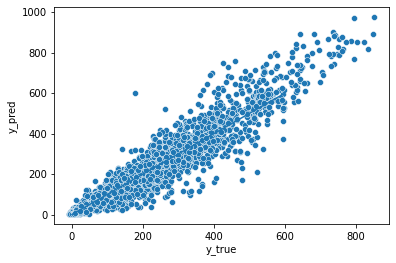

In [ ]:
y_pred = svr.predict(X_test)

print_results(y_test, y_pred)

visualize_regression(y_pred, y_test)

SVM Scores are good too

### Train on First Year

In [ ]:
from sklearn.svm import SVR

svr = SVR(kernel = 'rbf', C = 100, gamma = 0.1, epsilon = 0.1)
svr.fit(X_train_year, y_train_year)

SVR(C=100, gamma=0.1)

R^2 score: 0.49
MAE: 102.94
RMSE: 149.29


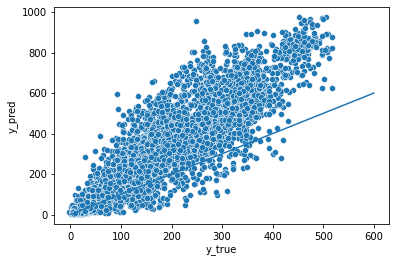

In [ ]:
y_pred = svr.predict(X_test_year)

print_results(y_test_year, y_pred)

visualize_regression(y_pred, y_test_year)

Now training only on the first year the performance is lower. Try some other tunes

## Gradient Boosting

### Full

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

gb = GradientBoostingRegressor(loss = 'squared_error', n_estimators = 100, learning_rate = 0.1, max_depth = 3)
gb.fit(X_train, y_train)

GradientBoostingRegressor()

R^2 score: 0.84
MAE: 48.52
RMSE: 71.22


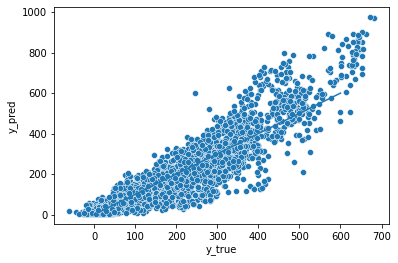

In [ ]:
y_pred = gb.predict(X_test)

print_results(y_test, y_pred)

visualize_regression(y_pred, y_test)

In [ ]:
get_important_features(X_test, gb)

Feature: 0, season, 0.027849521296677306
Feature: 1, yr, 0.0930486150905965
Feature: 2, mnth, 0.0074543417385976385
Feature: 3, hr, 0.626307032471287
Feature: 4, holiday, 0.0003857594472742608
Feature: 5, weekday, 0.00358410186063925
Feature: 6, workingday, 0.07655023116574468
Feature: 7, weathersit, 0.012685733741059784
Feature: 8, temp, 0.13117710263592644
Feature: 9, hum, 0.01963139257323167
Feature: 10, windspeed, 0.0013261679789655526


### Train on First Year

In [ ]:
gb = GradientBoostingRegressor(loss = 'squared_error', n_estimators = 100, learning_rate = 0.1, max_depth = 3)
gb.fit(X_train_year, y_train_year)

GradientBoostingRegressor()

R^2 score: 0.52
MAE: 97.74
RMSE: 144.59


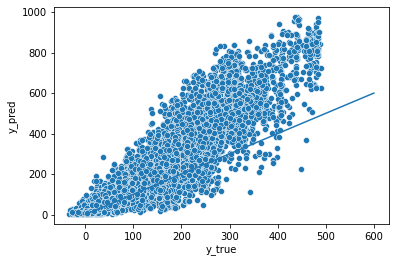

In [ ]:
y_pred = gb.predict(X_test_year)

print_results(y_test_year, y_pred)

visualize_regression(y_pred, y_test_year)

In [ ]:
get_important_features(X_test_year, gb)

Feature: 0, season, 0.03694474961915643
Feature: 1, yr, 0.0
Feature: 2, mnth, 0.024693886746194188
Feature: 3, hr, 0.6332715820099506
Feature: 4, holiday, 0.0005645241353758628
Feature: 5, weekday, 0.001832061820622923
Feature: 6, workingday, 0.08378835564887385
Feature: 7, weathersit, 0.016042015300333255
Feature: 8, temp, 0.17355640721155202
Feature: 9, hum, 0.02771668422250147
Feature: 10, windspeed, 0.001589733285439544


## Multitarget Analysis

In [ ]:
train = bike_df[bike_df['yr'] == 0]
val = bike_df[bike_df['yr'] == 1]

In [ ]:
features = ['season', 'mnth', 'hr', 'holiday', 'weekday', 'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed']
target_casual = 'casual'
target_registered = 'registered'
target_cnt = 'cnt'

In [ ]:
X_train_casual = train[features]
y_train_casual = train[target_casual]

knn_casual = KNeighborsRegressor(n_neighbors=5)
knn_casual.fit(X_train_casual, y_train_casual)


X_train_registered = train[features]
y_train_registered = train[target_registered]
knn_registered = KNeighborsRegressor(n_neighbors=5)
knn_registered.fit(X_train_registered, y_train_registered)

KNeighborsRegressor()

In [ ]:
X_val = val[features]
y_val_casual_pred = knn_casual.predict(X_val)
y_val_registered_pred = knn_registered.predict(X_val)

In [ ]:
mae_casual = mean_absolute_error(val[target_casual], y_val_casual_pred)
mae_registered = mean_absolute_error(val[target_registered], y_val_registered_pred)
print(f"Casual users MAE: {mae_casual}")
print(f"Registered users MAE: {mae_registered}")

y_val_cnt_pred = y_val_casual_pred + y_val_registered_pred

mae_cnt = mean_absolute_error(val[target_cnt], y_val_cnt_pred)
print(f"Combined cnt MAE: {mae_cnt}")

Casual users MAE: 17.343805816349896
Registered users MAE: 78.50867872681474
Combined cnt MAE: 93.05028623769178


We got better results for MAE with the previous models, like KNN or Random Forest.

# Conclusions

The best score we achieved training on FULL dataset is:
- Random Forest

The best score we achieved training on the first year is:
 - Decision tree (with hyperparameter tuning)


 The most important feature is the `hour` as we can see it from the feature_importance_ methods in all cases.